In [1]:
!pip install scikit-learn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [2]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [3]:
data = pd.read_csv('/gdrive/MyDrive/Hindi Dataset/Dataset/Dataset.csv')

In [4]:
data.head()

,Post,Labels Set,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,मेरे देश के हिन्दु बहुत निराले है। कुछ तो पक्क...,"hate,offensive",NaN,NaN,NaN
1,सरकार हमेशा से किसानों की कमाई को बढ़ाने के लि...,non-hostile,NaN,NaN,NaN
2,"सुशांत ने जो बिजनेस डील 9 जून को की थी, वो डील...",non-hostile,NaN,NaN,NaN
3,@prabhav218 साले जेएनयू छाप कमिने लोग हिन्दुओं...,"defamation,offensive",NaN,NaN,NaN
4,#unlock4guidelines - अनलॉक-4 के लिए गाइडलाइन्स...,non-hostile,NaN,NaN,NaN


Data Cleaning

In [5]:
import re
import numpy as np

def clean_text_hindi(text):
    # Check if 'text' is a NumPy array; if so, convert it to a list
    if isinstance(text, np.ndarray):
        text = text.tolist()

    # Ensure that 'text' is a string
    if not isinstance(text, str):
        return ""

    # Remove special characters and digits
    cleaned_text = re.sub(r'[^ऀ-ॿ\s]', '', text)
    # Convert to lowercase
    cleaned_text = cleaned_text.lower()
    # Tokenize the text
    words = word_tokenize(cleaned_text)
    # Reconstruct the cleaned text
    cleaned_text = ' '.join(words)
    return cleaned_text


In [6]:
# Clean the 'Post' column
data['Post'] = data['Post'].apply(clean_text_hindi)
data.head()

,Post,Labels Set,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,मेरे देश के हिन्दु बहुत निराले है। कुछ तो पक्क...,"hate,offensive",NaN,NaN,NaN
1,सरकार हमेशा से किसानों की कमाई को बढ़ाने के लि...,non-hostile,NaN,NaN,NaN
2,सुशांत ने जो बिजनेस डील जून को की थी वो डील दी...,non-hostile,NaN,NaN,NaN
3,साले जेएनयू छाप कमिने लोग हिन्दुओं को यह कहते ...,"defamation,offensive",NaN,NaN,NaN
4,अनलॉक के लिए गाइडलाइन्स जारी सितंबर से देशभर म...,non-hostile,NaN,NaN,NaN


In [7]:
cleaned_df = data[['Post','Labels Set']]

# the cleaned DataFrame
cleaned_df.head(5)

,Post,Labels Set
0,मेरे देश के हिन्दु बहुत निराले है। कुछ तो पक्क...,"hate,offensive"
1,सरकार हमेशा से किसानों की कमाई को बढ़ाने के लि...,non-hostile
2,सुशांत ने जो बिजनेस डील जून को की थी वो डील दी...,non-hostile
3,साले जेएनयू छाप कमिने लोग हिन्दुओं को यह कहते ...,"defamation,offensive"
4,अनलॉक के लिए गाइडलाइन्स जारी सितंबर से देशभर म...,non-hostile


In [8]:
# Define valid labels
valid_labels = ['hostile', 'non-hostile', 'hate','offensive', 'defamation','fake']
# Create a list to store filtered rows
filtered_rows = []
# Iterate through the DataFrame
for index, row in cleaned_df.iterrows():
    labels = row['Labels Set'].split()  # Split labels by space
    valid_labels_in_row = [label for label in labels if label in valid_labels]

    if len(valid_labels_in_row) > 0:
        filtered_rows.append({
            'Cleaned_Post': row['Post'],
            'valid_labels': ' '.join(valid_labels_in_row)
        })
# Create a DataFrame from the filtered rows
filtered_df = pd.DataFrame(filtered_rows)
filtered_df.head()

,Cleaned_Post,valid_labels
0,सरकार हमेशा से किसानों की कमाई को बढ़ाने के लि...,non-hostile
1,सुशांत ने जो बिजनेस डील जून को की थी वो डील दी...,non-hostile
2,अनलॉक के लिए गाइडलाइन्स जारी सितंबर से देशभर म...,non-hostile
3,चीन ने में तर्क दिया की भारत का विपक्ष ही अजर ...,fake
4,देश में के रिकॉर्ड मामले,non-hostile


In [9]:
def group_labels(label):
    if label in ['fake', 'defamation', 'offensive', 'hate']:
        return 'hostile'
    else:
        return label

# Apply the function to create a new column 'Grouped_Labels'
filtered_df['Grouped_Labels'] = filtered_df['valid_labels'].apply(group_labels)

# Print the DataFrame with the new 'Grouped_Labels' column
print(filtered_df)

                                           Cleaned_Post valid_labels  \
0     सरकार हमेशा से किसानों की कमाई को बढ़ाने के लि...  non-hostile   
1     सुशांत ने जो बिजनेस डील जून को की थी वो डील दी...  non-hostile   
2     अनलॉक के लिए गाइडलाइन्स जारी सितंबर से देशभर म...  non-hostile   
3     चीन ने में तर्क दिया की भारत का विपक्ष ही अजर ...         fake   
4                              देश में के रिकॉर्ड मामले  non-hostile   
...                                                 ...          ...   
6302  चंद फेंके हुए टुकड़ों के लिए हमेशा ही देश से ग...         hate   
6303  आँखों ही आँखों में इशारा हो गया बैठे बैठे जीने...   defamation   
6304  औरंगाबाद में फिर धीरेधीरे पांव पसार रहा कोरोना...  non-hostile   
6305  बाइस्कोप कादर के संवादों का कमाल डिंपल की कलम ...  non-hostile   
6306  आखिरकार पॉन्डिचेरी विश्वविद्यालय के रामू नाम क...         fake   

     Grouped_Labels  
0       non-hostile  
1       non-hostile  
2       non-hostile  
3           hostile  
4       non-hostile  
...

In [10]:
# Define valid labels and their corresponding binary mapping
label_mapping = {
    'hostile': 1,  # Map 'hostile' to 1 (positive class)
    'non-hostile': 0,  # Map 'non-hostile' to 0 (negative class)
}

# Create a new column 'binary_labels' by mapping 'Grouped_Labels' using the label_mapping dictionary
filtered_df['binary_labels'] = filtered_df['Grouped_Labels'].map(label_mapping)

filtered_df.head()

,Cleaned_Post,valid_labels,Grouped_Labels,binary_labels
0,सरकार हमेशा से किसानों की कमाई को बढ़ाने के लि...,non-hostile,non-hostile,0
1,सुशांत ने जो बिजनेस डील जून को की थी वो डील दी...,non-hostile,non-hostile,0
2,अनलॉक के लिए गाइडलाइन्स जारी सितंबर से देशभर म...,non-hostile,non-hostile,0
3,चीन ने में तर्क दिया की भारत का विपक्ष ही अजर ...,fake,hostile,1
4,देश में के रिकॉर्ड मामले,non-hostile,non-hostile,0


Data Visualization

Hostile posts: 3543
Fake posts: 1312
Defamation posts: 384
Hate posts: 584
Offensive posts: 484


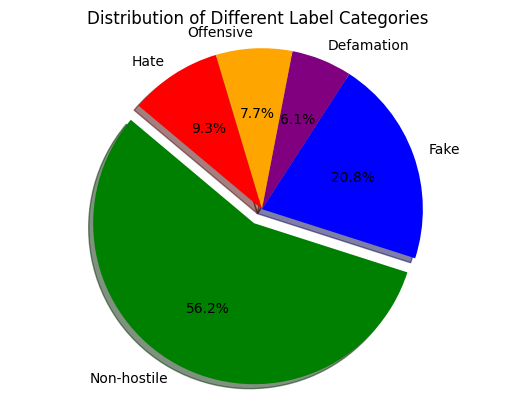

In [11]:
# Count the number of posts for each label category
non_hostile_count = filtered_df[filtered_df['valid_labels'].str.contains('non-hostile')].shape[0]
fake_count = filtered_df[filtered_df['valid_labels'].str.contains('fake')].shape[0]
defamation_count = filtered_df[filtered_df['valid_labels'].str.contains('defamation')].shape[0]
offensive_count = filtered_df[filtered_df['valid_labels'].str.contains('offensive')].shape[0]
hate_count = filtered_df[filtered_df['valid_labels'].str.contains('hate')].shape[0]
# Print the counts
print(f"Hostile posts: {non_hostile_count}")
print(f"Fake posts: {fake_count}")
print(f"Defamation posts: {defamation_count}")
print(f"Hate posts: {hate_count}")
print(f"Offensive posts: {offensive_count}")

# Data for the pie chart
labels = ['Non-hostile', 'Fake', 'Defamation', 'Offensive', 'Hate']
sizes = [non_hostile_count, fake_count, defamation_count, offensive_count, hate_count,]
colors = ['green', 'blue', 'purple', 'orange', 'red', 'gray']
explode = (0.1, 0, 0, 0, 0)  # Explode the 1st slice (Non-hostile)

# Create a pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Different Label Categories')
plt.show()


In [12]:
from sklearn.utils import resample

majority_class = filtered_df[filtered_df['Grouped_Labels'] == 'non-hostile']
minority_class = filtered_df[filtered_df['Grouped_Labels'] == 'hostile']

# Undersample the majority class to have the same number of samples as the minority class
majority_downsampled = resample(majority_class, replace=False, n_samples=len(minority_class), random_state=42)

# Concatenate the minority class and the downsampled majority class to create the balanced dataset
balanced_data = pd.concat([minority_class, majority_downsampled])

# Shuffle the rows of the balanced dataset
balanced_data = balanced_data.sample(frac=1, random_state=42)

balanced_data.head()

,Cleaned_Post,valid_labels,Grouped_Labels,binary_labels
5759,कोरोना काल में ने बनाया रिकॉर्ड में बेची करोड़...,non-hostile,non-hostile,0
3149,कोरोना आइसोलेशन वार्ड में डॉक्टर द्वारा महिला ...,fake,hostile,1
610,का पोछा लगाने वाले डिवाइस मिलने में अभी होगी देरी,non-hostile,non-hostile,0
3996,नीतीश कुमार की अध्यक्षता में बिहार विकास मिशन ...,non-hostile,non-hostile,0
125,जबकि हमीरपुर में प्रतिशत सम्भल में प्रतिशत हाथ...,non-hostile,non-hostile,0


In [13]:
# Count the occurrences of each label
label_counts = balanced_data['Grouped_Labels'].value_counts()

# Print the label counts
print(label_counts)

non-hostile    2764
hostile        2764
Name: Grouped_Labels, dtype: int64


Non-hostile posts: 2764
Fake posts: 1312
Defamation posts: 384
Offensive posts: 484
Hate posts: 584


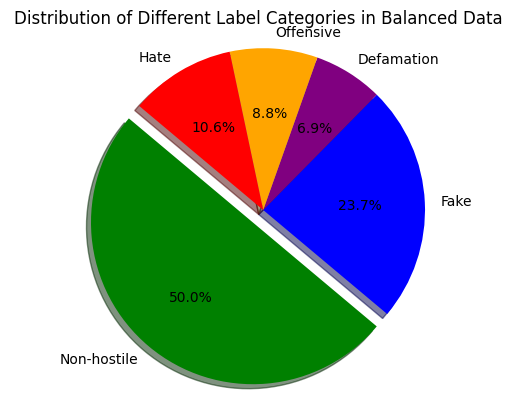

In [14]:
# Count the number of posts for each label category in balanced_data
non_hostile_count = balanced_data[balanced_data['valid_labels'].str.contains('non-hostile')].shape[0]
fake_count = balanced_data[balanced_data['valid_labels'].str.contains('fake')].shape[0]
defamation_count = balanced_data[balanced_data['valid_labels'].str.contains('defamation')].shape[0]
offensive_count = balanced_data[balanced_data['valid_labels'].str.contains('offensive')].shape[0]
hate_count = balanced_data[balanced_data['valid_labels'].str.contains('hate')].shape[0]

# Print the counts
print(f"Non-hostile posts: {non_hostile_count}")
print(f"Fake posts: {fake_count}")
print(f"Defamation posts: {defamation_count}")
print(f"Offensive posts: {offensive_count}")
print(f"Hate posts: {hate_count}")

# Data for the pie chart
labels = ['Non-hostile', 'Fake', 'Defamation', 'Offensive', 'Hate']
sizes = [non_hostile_count, fake_count, defamation_count, offensive_count, hate_count]
colors = ['green', 'blue', 'purple', 'orange', 'red']
explode = (0.1, 0, 0, 0, 0)  # Explode the 1st slice (Non-hostile)

# Create a pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Different Label Categories in Balanced Data')
plt.show()


In [15]:
# Save the cleaned dataset to a CSV file
clean_data = balanced_data.to_csv('/gdrive/MyDrive/Hindi Dataset/Dataset/Cleaned_Dataset.csv', index=False)

print("Cleaned dataset saved to 'Cleaned_Dataset.csv'")

Cleaned dataset saved to 'Cleaned_Dataset.csv'


Data Preprocessing

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Load Hindi stopwords from CSV file
with open('/gdrive/MyDrive/Hindi Dataset/Dataset/hindi_stopwords.csv', 'r', encoding='utf-8') as file:
    hindi_stopwords = file.read().splitlines()

# Create a TfidfVectorizer with Hindi stopwords
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words=hindi_stopwords)

# Fit and transform the cleaned Hindi text data
tfidf_matrix = tfidf_vectorizer.fit_transform(filtered_df['Cleaned_Post'])

# Convert the TF-IDF matrix to a dense array
tfidf_array = tfidf_matrix.toarray()

# Print the shape of the TF-IDF array
print("TF-IDF Array Shape:", tfidf_array.shape)

TF-IDF Array Shape: (6307, 1000)


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['अगर', 'अत', 'अथव', 'अध', 'अन', 'अपन', 'अब', 'अभ', 'आग', 'आज', 'आद', 'आप', 'आपक', 'इत', 'इन', 'इनक', 'इस', 'इसक', 'इसम', 'इसल', 'उन', 'उनक', 'उस', 'उसक', 'ऊपर', 'एक', 'एव', 'एस', 'ऐस', 'और', 'कई', 'कब', 'कभ', 'कम', 'कर', 'करत', 'करन', 'कल', 'कह', 'कहत', 'गई', 'गए', 'गय', 'जब', 'जबक', 'जर', 'जह', 'झक', 'तक', 'तथ', 'तन', 'तब', 'तर', 'तरह', 'तहत', 'दर', 'धर', 'नस', 'पड', 'पर', 'पहल', 'बड', 'बन', 'बह', 'मगर', 'यत', 'यद', 'यम', 'यह', 'रख', 'रत', 'रह', 'रहत', 'लक', 'वय', 'वर', 'वह', 'वग़', 'सक', 'सकत', 'सभ', 'सम', 'समय', 'सर', 'सस', 'हम', 'हमन', 'हर'] not in stop_words.
  warnings.warn(


In [17]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Pad the sequences
max_sequence_length = 100
padded_sequences = pad_sequences(tfidf_array, maxlen=max_sequence_length, padding='post')

In [18]:
from sklearn.model_selection import train_test_split

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, filtered_df['Grouped_Labels'], test_size=0.2, random_state=42)

# Further split the training set into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Print the shapes of the sets
print("Train set shapes:", X_train.shape, y_train.shape)
print("Validation set shapes:", X_val.shape, y_val.shape)
print("Test set shapes:", X_test.shape, y_test.shape)

Train set shapes: (4036, 100) (4036,)
Validation set shapes: (1009, 100) (1009,)
Test set shapes: (1262, 100) (1262,)


LOGISTICS REGRESSION MODEL

In [19]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Split the dataset into train, validation, and test sets
X_train, X_val_test, y_train, y_val_test = train_test_split(
    filtered_df['Cleaned_Post'],  # text data
    filtered_df['Grouped_Labels'],  # labels
    test_size=0.4,
    random_state=42
)

# Further split the validation and test sets
X_val, X_test, y_val, y_test = train_test_split(
    X_val_test,
    y_val_test,
    test_size=0.5,
    random_state=42
)

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)

# Fit and transform the TF-IDF vectorizer on the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the validation and test data
X_val_tfidf = tfidf_vectorizer.transform(X_val)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Create and train the Logistic Regression model
logistic_regression_model = LogisticRegression(max_iter=1000)

logistic_regression_model.fit(X_train_tfidf, y_train)

# Make predictions on the validation set
y_val_pred = logistic_regression_model.predict(X_val_tfidf)

# Evaluate the model
accuracy_val = accuracy_score(y_val, y_val_pred)
classification_rep_val = classification_report(y_val, y_val_pred)

print("Validation Set Accuracy:", accuracy_val)
print("Classification Report (Validation):\n", classification_rep_val)

# Make predictions on the test set
y_test_pred = logistic_regression_model.predict(X_test_tfidf)

# Evaluate the model on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
classification_rep_test = classification_report(y_test, y_test_pred)

print("Test Set Accuracy:", accuracy_test)
print("Classification Report (Test):\n", classification_rep_test)

# Calculate and print the train accuracy
y_train_pred = logistic_regression_model.predict(X_train_tfidf)
accuracy_train = accuracy_score(y_train, y_train_pred)
print("Train Set Accuracy:", accuracy_train)


Validation Set Accuracy: 0.7398889770023791
Classification Report (Validation):
               precision    recall  f1-score   support

     hostile       0.72      0.65      0.68       543
 non-hostile       0.75      0.81      0.78       718

    accuracy                           0.74      1261
   macro avg       0.74      0.73      0.73      1261
weighted avg       0.74      0.74      0.74      1261

Test Set Accuracy: 0.7393026941362916
Classification Report (Test):
               precision    recall  f1-score   support

     hostile       0.73      0.66      0.70       566
 non-hostile       0.75      0.80      0.77       696

    accuracy                           0.74      1262
   macro avg       0.74      0.73      0.73      1262
weighted avg       0.74      0.74      0.74      1262

Train Set Accuracy: 0.8258456659619451


Confusion Matrix:
[[376 190]
 [139 557]]


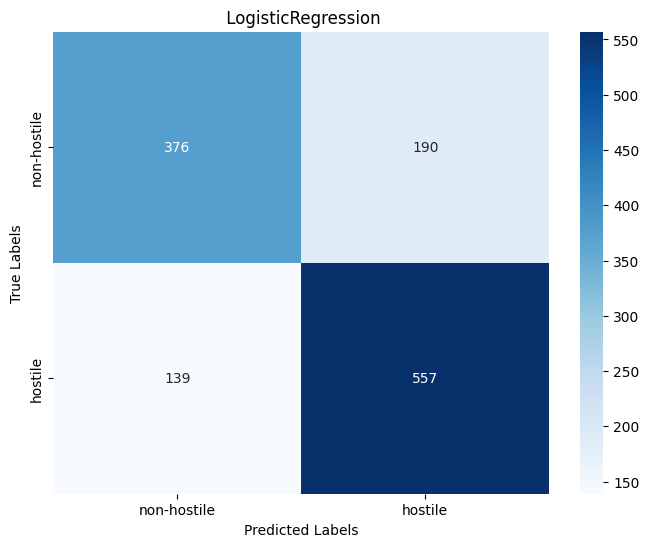

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['non-hostile', 'hostile'], yticklabels=['non-hostile', 'hostile'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title(' LogisticRegression')
plt.show()

Word Embeddings + Random Forest:  

In [64]:
from gensim.models import Word2Vec, KeyedVectors
from sklearn.ensemble import RandomForestClassifier

text_data = balanced_data['Cleaned_Post']

tokenized_data = [nltk.word_tokenize(sentence) for sentence in text_data]

# Train Word2Vec model
vector_size = 1000
window_size = 5
min_count = 1
word2vec_model = Word2Vec(tokenized_data, vector_size=vector_size, window = window_size, min_count=min_count)

# Load the KeyedVectors from the model
word_vectors = word2vec_model.wv

# Define a function to calculate the vector representation of a document
def document_vectorizer(doc, word_vectors):
    doc_vector = np.zeros(vector_size)
    num_words = 0
    for word in doc:
        if word in word_vectors:
            doc_vector += word_vectors.get_vector(word)
            num_words += 1
    if num_words > 0:
        doc_vector /= num_words
    return doc_vector

# Create document vectors for all documents
document_vectors = [document_vectorizer(doc, word_vectors) for doc in tokenized_data]

# Split data into train and test sets
X = np.array(document_vectors)
y = balanced_data['Grouped_Labels']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Transform the validation data using the same TF-IDF vectorizer
X_val_tfidf = tfidf_vectorizer.transform(X_val)

# Predict labels on the training set
y_train_pred = rf_classifier.predict(X_train)

# Predict labels on the validation set
y_val_pred = rf_classifier.predict(X_val_tfidf)

# Predict labels on the test set
y_test_pred = rf_classifier.predict(X_test)

# Calculate accuracy on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)


# Calculate accuracy on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
classification_rep_test = classification_report(y_test, y_test_pred)

# Print the accuracies
print("Train Set Accuracy:", train_accuracy)

print("Test Set Accuracy:", test_accuracy)
print("Classification Report (Test):\n", classification_rep_test)


Train Set Accuracy: 0.9995477159656264
Test Set Accuracy: 0.72875226039783
Classification Report (Test):
               precision    recall  f1-score   support

     hostile       0.74      0.75      0.74       581
 non-hostile       0.72      0.70      0.71       525

    accuracy                           0.73      1106
   macro avg       0.73      0.73      0.73      1106
weighted avg       0.73      0.73      0.73      1106



Confusion Matrix:
[[437 144]
 [159 366]]


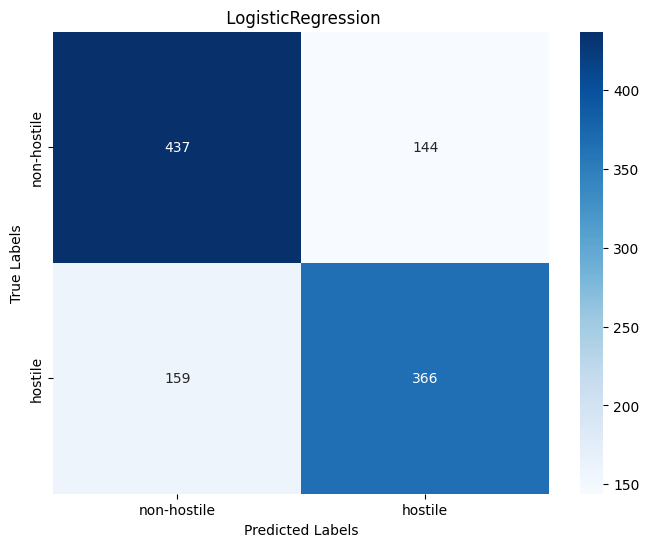

In [22]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['non-hostile', 'hostile'], yticklabels=['non-hostile', 'hostile'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title(' LogisticRegression')
plt.show()

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    filtered_df['Cleaned_Post'],  # text data
    filtered_df['Grouped_Labels'],  # labels
    test_size=0.2,
    random_state=42
)

# Define the N-gram range (2-grams)
ngram_range = (1, 2)

# Create a TfidfVectorizer with the specified N-gram range and max features
tfidf_vectorizer = TfidfVectorizer(ngram_range=ngram_range, max_features=1000)

# Fit and transform the text data to create a document-term matrix
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Create a Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()

# Train the Naive Bayes classifier
nb_classifier.fit(X_train_tfidf, y_train)

# Predict labels on the test set
y_pred = nb_classifier.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Test Set Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)


Test Set Accuracy: 0.7606973058637084
Classification Report:
               precision    recall  f1-score   support

     hostile       0.74      0.68      0.71       548
 non-hostile       0.77      0.82      0.79       714

    accuracy                           0.76      1262
   macro avg       0.76      0.75      0.75      1262
weighted avg       0.76      0.76      0.76      1262



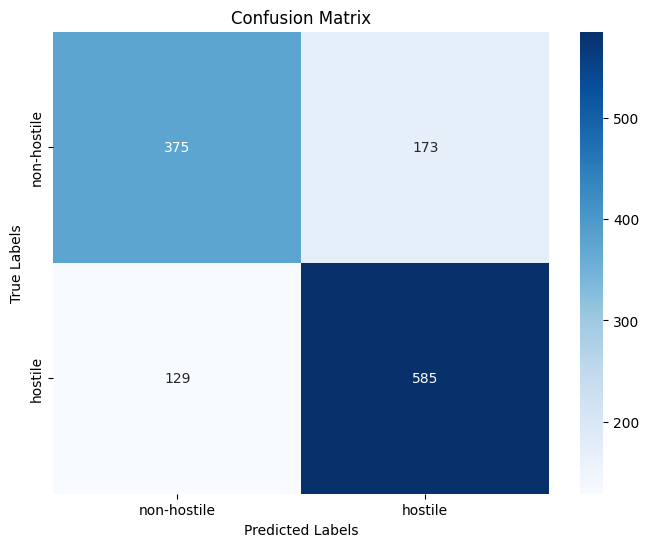

In [24]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['non-hostile', 'hostile'], yticklabels=['non-hostile', 'hostile'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


BERT MODEL

In [25]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 52.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 31.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 103.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 78.2 MB/s eta 0:00:00


In [26]:
from transformers import BertTokenizer, BertForSequenceClassification, AdamW

# Load the BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
model = BertForSequenceClassification.from_pretrained('bert-base-multilingual-cased', num_labels=len(y_train.unique()))


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [27]:
# Tokenize input data
train_encodings = tokenizer(list(X_train), truncation=True, padding=True)
val_encodings = tokenizer(list(X_val), truncation=True, padding=True)
test_encodings = tokenizer(list(X_test), truncation=True, padding=True)


In [28]:
import torch
from torch.utils.data import DataLoader, Dataset, TensorDataset
# Convert target labels to integers
y_train = y_train.map({'non-hostile': 0, 'hostile': 1})
y_val = y_val.map({'non-hostile': 0, 'hostile': 1})
y_test = y_test.map({'non-hostile': 0, 'hostile': 1})

# Now you can create the TensorDatasets
train_dataset = TensorDataset(torch.tensor(train_encodings.input_ids),
                              torch.tensor(train_encodings.attention_mask),
                              torch.tensor(y_train.values, dtype=torch.long))  # Specify dtype as torch.long for integer labels

val_dataset = TensorDataset(torch.tensor(val_encodings.input_ids),
                            torch.tensor(val_encodings.attention_mask),
                            torch.tensor(y_val.values, dtype=torch.long))

test_dataset = TensorDataset(torch.tensor(test_encodings.input_ids),
                             torch.tensor(test_encodings.attention_mask),
                             torch.tensor(y_test.values, dtype=torch.long))

# Create data loaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)


In [29]:
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from sklearn.metrics import accuracy_score, classification_report

# Define the number of training epochs
num_epochs = 5

# Load the BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
model = BertForSequenceClassification.from_pretrained('bert-base-multilingual-cased', num_labels=2)  # Assuming binary classification

# Move the model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Define the optimizer
optimizer = AdamW(model.parameters(), lr=1e-5)

# Training loop
for epoch in range(num_epochs):
    model.train()
    for batch in train_loader:
        input_ids, attention_mask, labels = batch
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

        # Filter labels that are out of bounds
        labels = labels[labels >= 0]

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

    # Validation loop
    model.eval()
    val_predictions = []
    val_true_labels = []
    val_losses = []

    with torch.no_grad():
        for batch in val_loader:
            input_ids, attention_mask, labels = batch
            input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

            # Filter labels that are out of bounds
            labels = labels[labels >= 0]

            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss.item()
            val_losses.append(loss)

            logits = outputs.logits
            probabilities = torch.softmax(logits, dim=1)
            predicted_labels = torch.argmax(probabilities, dim=1)

            val_predictions.extend(predicted_labels.cpu().numpy())
            val_true_labels.extend(labels.cpu().numpy())

    # Calculate validation accuracy and other metrics
    val_accuracy = accuracy_score(val_true_labels, val_predictions)
    val_classification_report = classification_report(val_true_labels, val_predictions)

    print(f"Epoch {epoch + 1}/{num_epochs}")
    print(f"Validation Loss: {sum(val_losses) / len(val_losses)}")
    print(f"Validation Accuracy: {val_accuracy}")
    print(f"Validation Classification Report:\n{val_classification_report}")

# Test loop
model.eval()
test_predictions = []
test_true_labels = []
test_losses = []

with torch.no_grad():
    for batch in test_loader:
        input_ids, attention_mask, labels = batch
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

        # Filter labels that are out of bounds
        labels = labels[labels >= 0]

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss.item()
        test_losses.append(loss)

        logits = outputs.logits


        probabilities = torch.softmax(logits, dim=1)
        predicted_labels = torch.argmax(probabilities, dim=1)

        test_predictions.extend(predicted_labels.cpu().numpy())
        test_true_labels.extend(labels.cpu().numpy())

# Calculate test accuracy and other metrics
test_accuracy = accuracy_score(test_true_labels, test_predictions)
test_classification_report = classification_report(test_true_labels, test_predictions)

print("Test Loss:", sum(test_losses) / len(test_losses))
print("Test Accuracy:", test_accuracy)
print("Test Classification Report:\n", test_classification_report)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/5
Validation Loss: 0.40921404026448727
Validation Accuracy: 0.8318794607454402
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.81      0.85       718
           1       0.77      0.86      0.82       543

    accuracy                           0.83      1261
   macro avg       0.83      0.84      0.83      1261
weighted avg       0.84      0.83      0.83      1261

Epoch 2/5
Validation Loss: 0.32452042810618875
Validation Accuracy: 0.8683584456780333
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       718
           1       0.90      0.78      0.84       543

    accuracy                           0.87      1261
   macro avg       0.87      0.86      0.86      1261
weighted avg       0.87      0.87      0.87      1261

Epoch 3/5
Validation Loss: 0.3743302471935749
Validation Accuracy: 0.8413957176843775
Validation Classif

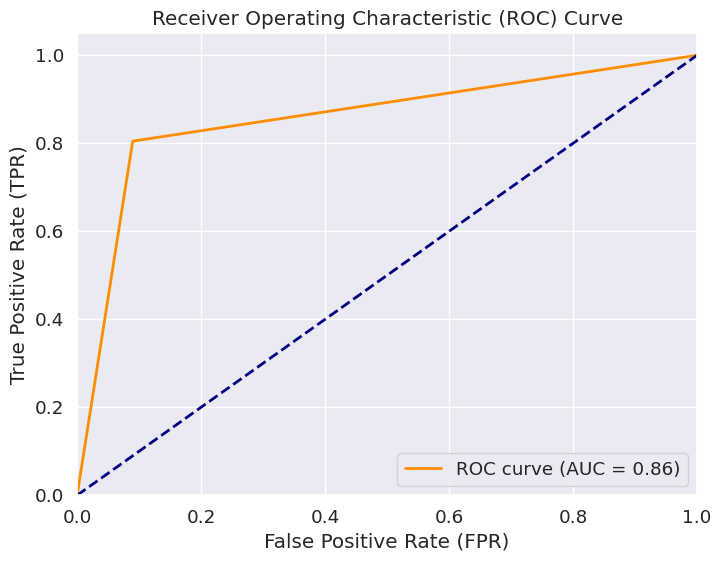

In [59]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(test_true_labels, test_predictions)
roc_auc = roc_auc_score(test_true_labels, test_predictions)

plt.figure(figsize=(8, 6))

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')

# Add a diagonal line for reference (random classifier)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Show the plot
plt.show()
